

This code is partly taken from "Leaders and Followers" of Jacob Eisenstein, 2019 - https://www.aclweb.org/anthology/N19-5003.pdf

Linguistic interactions are complex games of give-and-take. Speakers tend to accommodate to each other, although the degree of accommodation is sometimes modulated by social differences such as relative status.
This notebook employs the Hawkes Process to estimate influence weights between pairs of speakers.


# Importing libraries

We'll use the `pyhawkes` library for Hawkes processes (https://github.com/slinderman/pyhawkes/). Install by

```
pip install --user pyhawkes
```

This library implements the standard HP as well as many interesting Bayesian variants, described by [Linderman and Adams](https://arxiv.org/abs/1507.03228). We'll only use with the standard HP in this notebook.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

from tqdm import tqdm_notebook as tqdm

import os, sys
from glob import glob
import pickle

import pyhawkes

import sys
import math

## Loading the data

In [2]:
dir_address = '/Users/yuribizzoni/Downloads/'# here the directory to the corpus

In [424]:
file = open(dir_address+'rsc4_herschel.tbl', encoding='latin1').read()
lines = file.split("\n")
tabs = [l.split("\t") for l in lines]
tabs.reverse()
print(len(tabs))
print("first line looks like this: ",tabs[1],"\n")

outfile= open(letters_dir+"rsc4_herschel-ordered.txt","w")
for line in tabs:
    #line = [str(e) for e in line]
    if len(line)==6:
        to_write = "\t".join(line)
        outfile.write(to_write+"\n")
outfile.close()

# adapting the file
tabs = [l for l in tabs if len(l)==6]
print(len(tabs))
new_doc = []
pre_year, pre_author,all_text = 0,"",""""""
for line in tabs:
    year, author, text = line[2], line[3], line[-1]
    if year==pre_year and pre_author==author: all_text += text
    else: 
        new_doc.append([int(pre_year),pre_author,all_text])
        pre_year,pre_author,all_text=year,author,text
        
new_doc.append([int(pre_year),pre_author,all_text])
print(len(new_doc))
new_doc = [line for line in new_doc if len(line[-1])>1]
new_doc.sort()
len(new_doc)


#print it out
#outfile= open(letters_dir+"rsc4_herschel-merged.tbl","w")
#for line in new_doc:
#    line = [str(e) for e in line]
#    to_write = "\t".join(line)
#    outfile.write(to_write+"\n")
#outfile.close()

26820
first line looks like this:  ['1', '105436', '1765', 'J. Parsons', 'Observation', 'the wood in which they lie was said to be cedar ; but it rather seems to be of sir , having a fissile grain like common deal wood , and is as easily split as that ; it is also extremely light , and its fibres are very loose , nor has it the least smell like cedar ; they have the same colour , which is of a yellowish cast ; but the cedar has a close smooth grain , though it is a light wood , and soft in itself : whereas this does not seem to be as hard as what we call white deal , which is esteemed the lightest and tenderest of all the class of firs .'] 

26819
1980


1979

In [580]:

file = open(letters_dir+'rsc4_hematology-merged.tbl', encoding='latin1').read()
lines = file.split("\n")
tabs = [l.split("\t") for l in lines]
prey=0
for tab in tabs:
    if len(tab[0])>1:
        year = int(tab[0])
        print(year)
        if prey>year: print("A Warning")
        prey=year

1780
1780
1781
1781
1782
1783
1783
1784
1784
1785
1785
1785
1785
1785
1786
1786
1787
1787
1788
1788
1788
1788
1788
1789
1789
1790
1791
1791
1792
1792
1792
1793
1793
1793
1795
1795
1795
1795
1795
1796
1796
1796
1796
1797
1797
1797
1797
1798
1798
1799
1799
1799
1799
1800
1800
1800
1800
1800
1800
1800
1800
1800
1800
1800
1800
1800
1800
1800
1800
1801
1801
1801
1801
1801
1802
1802
1802
1804
1804
1804
1805
1805
1805
1805
1805
1805
1806
1806
1807
1807
1808
1808
1808
1808
1809
1809
1809
1809
1809
1809
1810
1810
1810
1810
1811
1811
1811
1811
1811
1813
1813
1813
1814
1814
1814
1815
1815
1815
1815
1815
1815
1815
1815
1815
1815
1815
1815
1815
1815
1815
1815
1815
1815
1815
1815
1815
1815
1815
1815
1815
1815
1815
1815
1815
1815
1815
1815
1816
1816
1817
1817
1817
1817
1817
1817
1817
1818
1819
1819
1819
1819
1820
1820
1820
1820
1820
1820
1821
1821
1821
1822
1822
1822
1822
1822
1822
1823
1823
1823
1823
1824
1824
1824
1824
1824
1825
1825
1825
1825
1825
1825
1826
1826
1826
1826
1826
1826
1826
1827
1827


In [1641]:
df = pd.read_csv(os.path.join(letters_dir, 'rsc4_chem_terms-sorted.tbl'), #rsc4_chem_terms-sorted-merged.tbl
                 delimiter='\t',
                 names="number number2 year author field text".split(), encoding='latin-1')#, engine="python",quotechar='"', error_bad_lines=False)
                 #names=['line','year','author','text'])  #m

In [1642]:
# the texts look like this

print(df.head(-3))
len(df)


       number  number2  year                            author  \
0           1   105870  1770                  William Hamilton   
1           1   105870  1770                  William Hamilton   
2           1   105870  1770                  William Hamilton   
3           1   105870  1770                  William Hamilton   
4           1   105871  1770                   Philip Carteret   
5           1   105873  1770                   James Johnstone   
6           1   105875  1770                   Charles Douglas   
7           1   105875  1770                   Charles Douglas   
8           1   105875  1770                   Charles Douglas   
9           1   105875  1770                   Charles Douglas   
10          1   105877  1770                 Daines Barrington   
11          1   105877  1770                 Daines Barrington   
12          1   105878  1770                       Samuel Dunn   
13          1   105879  1770                 Keane Fitz Gerald   
14        

19109

In [1677]:
oxygroup = "oxyg, phlogiston, dephlogisticated, acid, water, gas, hydrogen, hydrogene, substance, solution, oxide, compound, muriatic".split(', ')

In [1683]:
file = open(letters_dir+'rsc4_chem_terms-sorted-merged.tbl', encoding='latin1').read()
lines = file.split("\n")
print(len(lines))
tabs = [l.split("\t") for l in lines]
print(len(tabs), len(tabs[10]))
tabs = [t for t in tabs if len(t)==4]
for t in tabs:
    line, year, name, text = t
    if 'William Herschel' in name: 
        print(year)
        for w in oxygroup:
            if w in text:
                print(name, w)
                idx = text.index(w)
                print(text[idx-50:idx+50])

1350
1350 4
1781
1782
1783
1783
William Herschel compound
 of the sun between so many other ( and variously compounded ) motions of the stars .we see also , t
1784
William Herschel compound
and give a true measure notwithstanding ; and the compound eye-piece i used with the 20-feet reflect
1784
William Andre|Joseph Banks|William Herschel substance
f calcareous earth already deposited within their substance .there is not only a difference of their
1785
William Herschel solution
unt , such gages may very justly be admitted in a solution where practical truth rather than mathema
William Herschel compound
cision is the end we have in view .but then these compound or double nebulae , which are those of th
1790
William Herschel substance
 borealis , than a reflection from some permanent substance ; but its disapparition in general , and
1793
1794
1795
William Herschel water
d , the birds fly in the air , and fishes swim in water ; ' we can certainly not object to the conve
William Herschel s

In [1669]:
#df[dim]
tabs[100]

['-1',
 '1774',
 'William Henley|Richard Nairne',
 "they had a severe thunder storm that night ; but think how pleased i was to find , that , from the wetness of the ship 's sides , the electricity passed into the water , without the least injury to the ship ; but the spark on the point of the conductor , which was very sharp , was so lucid , that my people were very much frightned .this key is terminated by a thick blunted end : the spire is covered with lead , from the key to the brick tower ; and so far the lightning was conducted with safety to the building ; nor could i observe , that there had been the least fusion upon the metal ; some parts of it , however , i could not get at to examine ; but having quitted the lead work , and entered the brick tower , it there did considerable damage , till it reached the leaded roof on the body of the church ; whence it seems to have been conducted , by the pipes , which carry down the rain water , and which reach to the bottom of the buildi

In [1369]:
#choose the dimension
dim = 'author'

In [1370]:
prob = dict(df[dim].value_counts())

In [1371]:
speakers_ = [a for a in df['author'] if a.__class__ == str]
#print(speakers_)

In [1629]:
speakers = []
for speaker in speakers_: 
    if speaker not in speakers and prob[speaker]>7: speakers.append(speaker)

K = len(speakers)
print(K)
print(speakers[:30])  ### here the 'speakers' are gender_per_period artificial groups

25
['Joseph Priestley', 'Henry Cavendish', 'John Hunter', 'Charles Blagden', 'Tiberius Cavallo', 'Richard Kirwan', 'William Herschel', 'Everard Home', 'Smithson Tennant', 'George Pearson', 'Charles Hatchett', 'Anthony Carlisle', 'Thomas Young', 'William Hyde Wollaston', 'William Henry', 'Count de Bournon', 'Richard Chenevix', 'Thomas Andrew Knight', 'Humphry Davy', 'James Smithson', 'H. Davy', 'B. C. Brodie', 'William Thomas Brande', 'John Davy', 'David Brewster']


In [1451]:
#speakers += ['Caroline Herschel']
speakers = [s for s in speakers if s != 'H. Davy']
len(speakers)

24

## Text processing

Now let's process the text, building a vocabulary of the words used by the writers.

We build a vocabulary by using the `CountVectorizer` class from `scikit-learn`.

In [1453]:
neb_var = 'nebula|nebulae|nebule|nebulosity|nebulous|nebular|nebulosa|nebulas'
ast_var = '|saturn|luminous|brightness|illuminate|position|cluster|object|lustre|spectrum|bright|eye|star|ray|light|catalogue|formation|rotation'
#hem_var = 'germ, tissue, blood corpuscle, blood corpuscles, ovary, larva, filament, vesicle, germinal, corpuscle, corpuscles, plexus'.replace(', ','|')

In [1454]:
tok_pat = 'oxygen'#neb_var+ast_var#'phlogist'#neb_var+#'(?u)\\b[A-z][A-z]+\\b'
vec = CountVectorizer(max_features=5000, token_pattern=tok_pat)#, adjust at pleasure
vec.fit(df.loc[df[dim].apply(lambda x : x in speakers)]['text'])

CountVectorizer(max_features=5000, token_pattern='oxygen')

In [1455]:
print(len(vec.vocabulary_))

1


In [1456]:
'oxygene' in vec.vocabulary_ #sanity check

False

In [1457]:
#vec.vocabulary_
words = [k for k in vec.vocabulary_.keys()]
words

['oxygen']

In [1458]:
##making sure the vocaularies coincide

def my_time(n,word,df):
    c=[i for i in range(n) if word in df.loc[i]["text"].lower()]
    return c

w=words[0]
print(w)
X = vec.transform(df['text'])
#print(X)
T=X.shape[0]
#print(my_time(T,w,df))
#print(X[:,vec.vocabulary_[w]].nonzero()[0])
print(my_time(T," "+w+" ",df)==X[:,vec.vocabulary_[w]].nonzero()[0])##bullssshittttt

oxygen
False


/Users/yuribizzoni/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


In [1459]:
X[:,vec.vocabulary_[w]].nonzero()[0]

array([ 423,  471,  492,  523,  541,  550,  551,  554,  559,  561,  563,
        566,  569,  574,  576,  580,  583,  605,  606,  619,  621,  632,
        639,  644,  660,  662,  663,  670,  671,  680,  689,  691,  699,
        706,  707,  710,  722,  723,  726,  729,  740,  741,  745,  746,
        747,  748,  750,  753,  762,  765,  767,  771,  772,  774,  783,
        787,  790,  794,  795,  802,  805,  808,  818,  825,  827,  832,
        835,  841,  848,  849,  854,  856,  858,  872,  873,  884,  890,
        894,  896,  906,  914,  916,  919,  921,  922,  933,  934,  938,
        943,  955,  960,  961,  962,  963,  965,  973,  974,  975,  976,
        978,  984,  987,  991, 1001, 1005, 1007, 1009, 1011, 1015, 1020,
       1025, 1026, 1027, 1030, 1032, 1033, 1034, 1037, 1038, 1039, 1044,
       1045, 1047, 1057, 1061, 1062, 1063, 1081, 1082, 1087, 1089, 1103,
       1117, 1120, 1135, 1137, 1146, 1162, 1165, 1171, 1177, 1185, 1187,
       1198, 1210, 1212, 1221, 1224, 1228, 1234, 12

In [1461]:
def make_cascades(data : pd.DataFrame, vocab : dict, speakers : list) -> list:
    cascades = [None] * len(vocab)
    X = vec.transform(data['text'])
    T = X.shape[0]
    K = len(speakers)
    for word,idx in vocab.items():
        #times = my_time(T,word,df) #
        times = X[:,idx].nonzero()[0]
        #print(times)
        cascade = np.zeros((T,K)) # we represent the cascade as a matrix of times and sources
        for time in times:
            #print("time: ", time)
            speaker = data.loc[time][dim]
            if speaker in speakers:
                cascade[time,speakers.index(speaker)] = X[time,idx]
        cascades[idx] = cascade.astype('int')
    return cascades

In [1463]:
len(speakers)

24

In [1465]:
%%time

cascades = make_cascades(df, vec.vocabulary_, speakers)
T = cascades[0].shape[0]
print(T)
cascades[0].shape

1331
CPU times: user 60.9 ms, sys: 2.91 ms, total: 63.8 ms
Wall time: 62.3 ms


In [1466]:
'oxygen' in words, 'oxygenous' in words

(True, False)

In [1467]:
#cascades[idx].nonzero()
T

1331

Text(0.5, 1.0, 'oxygen')

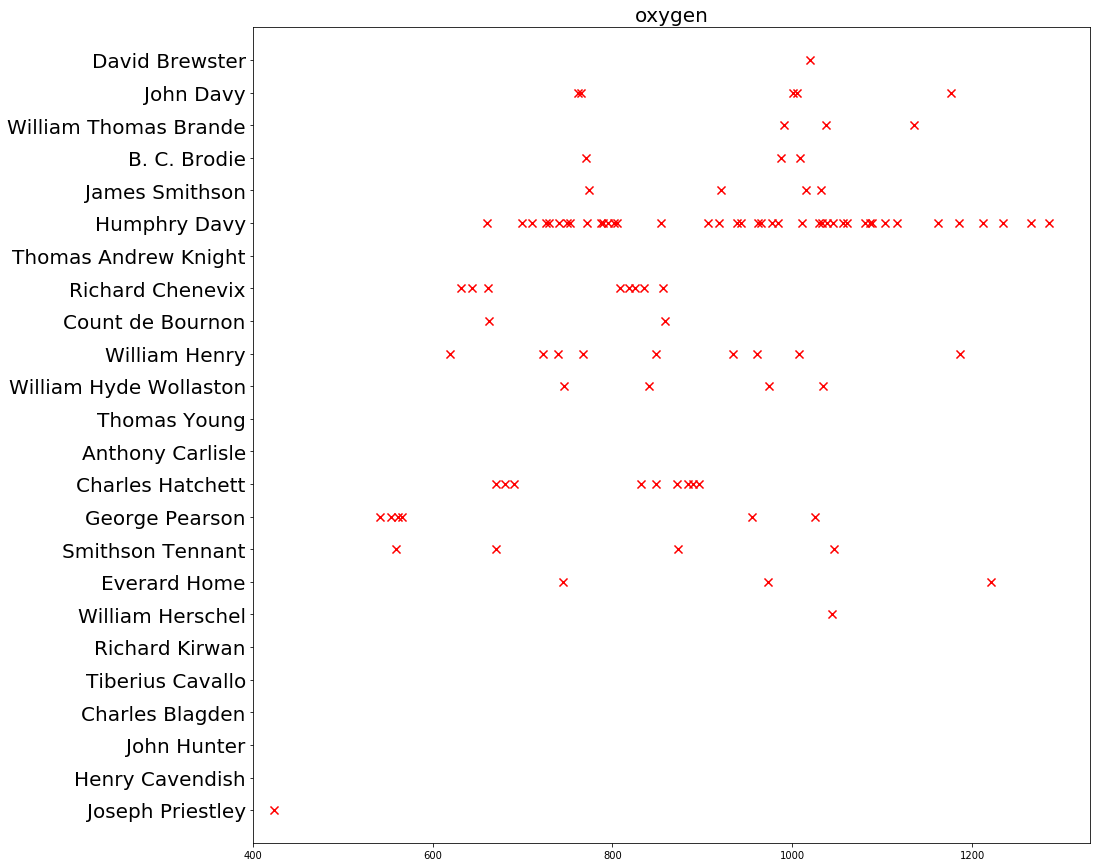

In [1469]:
word = words[0]
idx = vec.vocabulary_[word]
time,speaker = cascades[idx].nonzero()
plt.figure(figsize = (15,15))
plt.scatter(time,speaker,color='r',marker='x', s=65)
plt.xlim(400,T)
plt.ylim(-1,len(speakers))
plt.yticks(range(len(speakers)),speakers, size=20)
#plt.savefig("oxygen_24authors_bigger.png", bbox_inches="tight")
plt.title(word, size=20)

In [1195]:
words

['bright',
 'light',
 'eye',
 'ray',
 'star',
 'luminous',
 'brightness',
 'formation',
 'position',
 'object',
 'nebulous',
 'illuminate',
 'saturn',
 'lustre',
 'rotation',
 'catalogue',
 'nebula',
 'cluster',
 'nebule',
 'nebulosity',
 'spectrum']

## Time-decay kernel details

In `pyhawkes`, the kernel function is modeled as a sum over $B$ simple basis models,
\begin{equation}
\kappa_{i\to j}(\Delta t) = \sum_{b=1}^B g_b^{(i \to j)} \phi_b(\Delta t).
\end{equation}
- As the number of basis models increases, the decay kernel can be increasingly complex. 
- Each basis model is an impulse function, which is required to sum to 1.
- The weights over basis models, $g_b$, are dyad-specific.

In [1273]:
#K #number of speakers
K = len(speakers)
#K1 = 00
print(K)

2


In [1274]:
len(cascades[0])

1969

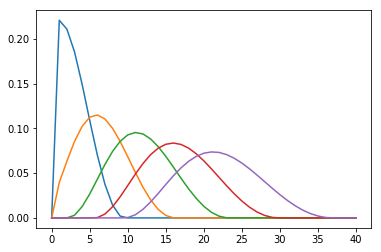

In [1260]:
hp = pyhawkes.models.DiscreteTimeStandardHawkesModel(K,allow_self_connections=False,B=5, dt_max=40.0)
plt.plot(hp.basis.basis)

In [1261]:
hp = pyhawkes.models.DiscreteTimeStandardHawkesModel(K,allow_self_connections=False, B=K, dt_max=len(cascades[0]))
print(hp.K)
#hp = pyhawkes.models.DiscreteTimeStandardHawkesModel(K,allow_self_connections=False,B=5, dt_max=10.0)
#print(hp.K)

2


## Adding training data

We have already generated the cascades; now we add them as training data to the model.

In [1263]:
%%time

for cascade in cascades:
    hp.add_data(cascade) #:0

CPU times: user 73 ms, sys: 3.89 ms, total: 76.9 ms
Wall time: 76.3 ms


In [1264]:
cascades.__class__

list

## Training

In [1265]:
# Unfortunately `pyhawkes` doesn't give an easy way to suppress its output
from ipykernel.iostream import OutStream

session = sys.stdout.session
pub_thread = sys.stdout.pub_thread
stream_name = sys.stdout.name
print(session, pub_thread, stream_name)

<jupyter_client.session.Session object at 0x102a9f828> <ipykernel.iostream.IOPubThread object at 0x102a9fcc0> stdout


In [1266]:
sys.stdout = open('hp-output.txt', 'w')

In [1267]:
%%time

hp.fit_with_bfgs_logspace()

/Users/yuribizzoni/anaconda3/lib/python3.6/site-packages/pyhawkes/models.py:416: RuntimeWarning: overflow encountered in exp
  self.weights[k,:] = np.exp(x)
/Users/yuribizzoni/.local/lib/python3.6/site-packages/numpy/core/_methods.py:38: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/Users/yuribizzoni/anaconda3/lib/python3.6/site-packages/pyhawkes/models.py:421: RuntimeWarning: overflow encountered in exp
  self.weights[k,:] = np.exp(x)
/Users/yuribizzoni/anaconda3/lib/python3.6/site-packages/pyhawkes/models.py:416: RuntimeWarning: overflow encountered in exp
  self.weights[k,:] = np.exp(x)
/Users/yuribizzoni/.local/lib/python3.6/site-packages/numpy/core/_methods.py:38: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [1268]:
sys.stdout = OutStream(session, pub_thread, stream_name)

### Results

In [1212]:
len(speakers)

40

All words, 20 authors
Some words, 50 authors
1 words, all authors

In [ ]:
## unviz
to_rank = []
chosen_speaker = 'Michael Faraday'
idx = speakers.index(chosen_speaker)
influences = hp.W[idx]
for i in range(len(speakers)): 
    speaker = speakers[i]
    to_rank.append((influences[i],speaker))
    
to_rank.sort()
to_rank.reverse()
to_rank

In [ ]:
### highest influence
to_rank_highest_inf = []
all_influences = hp.W

for i in range(len(all_influences)):
    individual_influences = all_influences[i]
    ma = max(individual_influences) 
    idx = individual_influences.argmax()
    to_rank_highest_inf.append((ma,speakers[i]+" on "+speakers[idx]))
    
to_rank_highest_inf.sort()
to_rank_highest_inf.reverse()
to_rank_highest_inf

In [ ]:
out.write("\nLargest Single Influence\n")
for el in to_rank_highest_inf:
    out.write(str(el)+"\n")

In [ ]:
### most widespread influencer 
threshold = .0005
to_rank_widespread_inf = []
all_influences = hp.W

for i in range(len(all_influences)):
    individual_influences = all_influences[i]
    higher_than = [influence for influence in individual_influences if influence>=threshold]
    to_rank_widespread_inf.append((len(higher_than),speakers[i]))
    
to_rank_widespread_inf.sort()
to_rank_widespread_inf.reverse()
to_rank_widespread_inf

In [1010]:
out.write("\nMost Widespread Influencer (threshold: "+str(threshold)+")\n")
for el in to_rank_widespread_inf:
    out.write(str(el)+"\n")

In [1011]:
### most influenced one 

threshold = .0005
all_influences = hp.W

influenced_authors = dict([(s,[]) for s in speakers])

for i in range(len(all_influences)):
    speaker = speakers[i]
    individual_influences = all_influences[i]
    higher_than = [speakers[j] for j in range(len(individual_influences)) if individual_influences[j]>=threshold]
    for author in higher_than:
        influenced_authors[author].append(speaker)

for author in influenced_authors.keys():
    influencers = influenced_authors[author]
    n_influencers = len(influencers)
    if n_influencers>0: print(author,n_influencers)#,influencers)

William Herschel 1
Everard Home 2
Smithson Tennant 3
George Pearson 3
Charles Hatchett 3
William Hyde Wollaston 3
William Henry 4
Count de Bournon 2
Richard Chenevix 1
Humphry Davy 6
James Smithson 2
H. Davy 4
B. C. Brodie 2
William Thomas Brande 3
John Davy 3
David Brewster 1


In [1012]:
out.write("\nMost Influenced (threshold: "+str(threshold)+")\n")
for author in influenced_authors.keys():
    influencers = influenced_authors[author]
    n_influencers = len(influencers)
    if n_influencers>0: out.write(author+" "+str(n_influencers)+" "+str(influencers)+"\n")

In [1013]:
out.close()

In [176]:
from IPython.display import HTML as html_print

In [177]:
def highlight_hits(text, wordlist, tokenizer):
    #print(text)
    tokens = tokenizer(text)
    #print(tokens)
    new_tokens = [f'<b>{token}</b>' if token.lower() in wordlist else token for token in tokens]
    #print(new_tokens)
    return ' '.join(new_tokens)

In [178]:
#df

In [218]:
def get_ab_pairs(data : pd.DataFrame,
                 speaker1 : str, 
                 speaker2 : str, 
                 max_gap : int = 3,
                 wordlist : list = [],
                 tokenizer = None):
    outputs = []
    
    ###imp2change
    
    #for line, (speaker, year, gender, text, name_g, year_g) in data.loc[data[dim]==speaker1].iterrows():
    for line, (year, author, text) in data.loc[data[dim]==speaker1].iterrows(): 
        responses = data.loc[line:line+max_gap]
        #print("responses: ", responses)
        s2_lines = responses.loc[responses[dim]==speaker2]
        #print("len s2lines: ", len(s2_lines))
        if len(s2_lines) > 0:
            if tokenizer is not None:
                html = highlight_hits(text, wordlist, tokenizer)
                print("html:",html)
            else: print("tokenizer is none")
            output = f'<UL><LI>{speaker1}({line}): {html}'
            hit_words = [word for word in list(set(wordlist).intersection(
                set([word.lower() for word in tokenizer(text)])))]
            #print(hit_words)
            
            
            ###and here 
            for line2, (_,_,text2) in s2_lines.iterrows():
                if tokenizer is not None:
                    html = highlight_hits(text2, hit_words, tokenizer)
                output+=(f'<LI>{speaker2}({line2}): {html}')
            output+='</UL>'
            outputs.append(output)
            
    return outputs

In [219]:
tokenizer = vec.build_tokenizer()
wordlist = list(vec.vocabulary_.keys())

In [224]:
wordlist_c = [w.lower() for w in wordlist]
wordlist_c

['spectrum']

In [221]:
#df.loc[df['gender']=='1680_1719-M']

In [222]:
pairs = get_ab_pairs(df,'William Hamilton','William Sharp',wordlist=['the'], tokenizer=tokenizer, max_gap=3)
print(len(pairs))
html_print(pairs[0])

html: 
1


In [216]:
speaker1, speaker2 = 'William Hamilton', 'William Sharp'

data=df
max_gap=2
for line, (year, author, text) in data.loc[data[dim]==speaker1].iterrows(): 
        responses = data.loc[line:line+max_gap]
        #print("responses: ", responses)
        s2_lines = responses.loc[responses[dim]==speaker2]
        if len(s2_lines)>0: print(s2_lines)

     year         author                                               text
183  1767  William Sharp  both the splints are , designedly , made narro...


In [217]:
for line, (year, author, text) in data.loc[data[dim]==speaker1].iterrows():
    print(line)

182
206
254
285
319
367
549
612
684
849


In [312]:
words = "germ, tissue, blood corpuscle, blood corpuscles, ovary, larva, filament, vesicle, germinal, corpuscle, corpuscles, plexus".split(", ")
print(words)
for line, (year, author,text) in data.loc[data['author']=='Michael Faraday'].iterrows(): 
    for word in words:
        if word in text: print("CONTAINS "+word)
    print(text+"\n\n")

['germ', 'tissue', 'blood corpuscle', 'blood corpuscles', 'ovary', 'larva', 'filament', 'vesicle', 'germinal', 'corpuscle', 'corpuscles', 'plexus']
of these , the first class of defects constitute the most serious evil , as they interfere with the rectilineal course of the rays of light while traversing the glass , while the latter are injurious merely from the interception of the rays , and their dispersion in all directions .the author begins this account by a statement of the usual defects incident to glass , which destroy the regularity of its action on light .




In [225]:
tokenizer("this is the stupid spectrum thing")

['spectrum']

In [ ]:
# from file to heatmap

In [1593]:
file = open('Astronomy_AllSelectedWords_40Authors_and_Caroline.txt').read()
lines = file.split("\n")
print(len(lines))
lines[1]
speakers = [l for l in lines[0].split("\t") if len(l)>0]
#print(speakers)


#towards the W: an array of arrays?
W = []
for line in lines[1:]:
    if len(line)>3:
        numbers = line.split("\t")[1:]
        numbers = [n for n in numbers if len(n)>0]
        #print(len(numbers))
        W.append([float(n) for n in numbers])

84


In [1594]:
print(len(W),len(speakers))

41 41


In [1595]:
#speakers

In [1600]:
#remove some authors

rej = ['H. Davy', 'J. Brinkley'] #doubles

rej += ['John Hunter', 'Everard Home', 'Anthony Carlisle','William Hyde Wollaston', 'Henry Cavendish', 'John Ellis',
'George Pearson', 'Daines Barrington', 'Charles Blagden']

prvW, new_speakers = [],[]
idxs = []
for i in range(len(W)):
    author = speakers[i]
    if author in rej: 
        print(author)
        idxs.append(i)
    else: 
        prvW.append(W[i])
        new_speakers.append(author)
        
        
print(idxs)

neW = []
for el in prvW:
    new_el = []
    for i in range(len(el)):
        if i not in idxs: new_el.append(el[i])
    neW.append(new_el)
    
print(len(neW),"\n")
for e in neW: print(len(e))

John Ellis
Henry Cavendish
Daines Barrington
John Hunter
Charles Blagden
Everard Home
George Pearson
William Hyde Wollaston
Anthony Carlisle
H. Davy
J. Brinkley
[0, 4, 5, 9, 10, 14, 15, 16, 19, 23, 36]
30 

30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


In [1601]:
new_speakers

['John Swinton',
 'Nevil Maskelyne',
 'Samuel Dunn',
 'William Hamilton',
 'Joseph Priestley',
 'Francis Wollaston',
 'Tiberius Cavallo',
 'Edward Pigott',
 'William Herschel',
 'Charles Hatchett',
 'Thomas Andrew Knight',
 'B. C. Brodie',
 'Count de Bournon',
 'David Brewster',
 'Henry Kater',
 'Humphry Davy',
 'James Ivory',
 'John Brinkley',
 'John Davy',
 'John Pond',
 'Thomas Young',
 'William Henry',
 'William Thomas Brande',
 'Robert Woodhouse',
 'Charles Bell',
 'Edward Sabine',
 'J. F. W. Herschel',
 'Peter Barlow',
 'Samuel Hunter Christie',
 'Caroline Herschel']

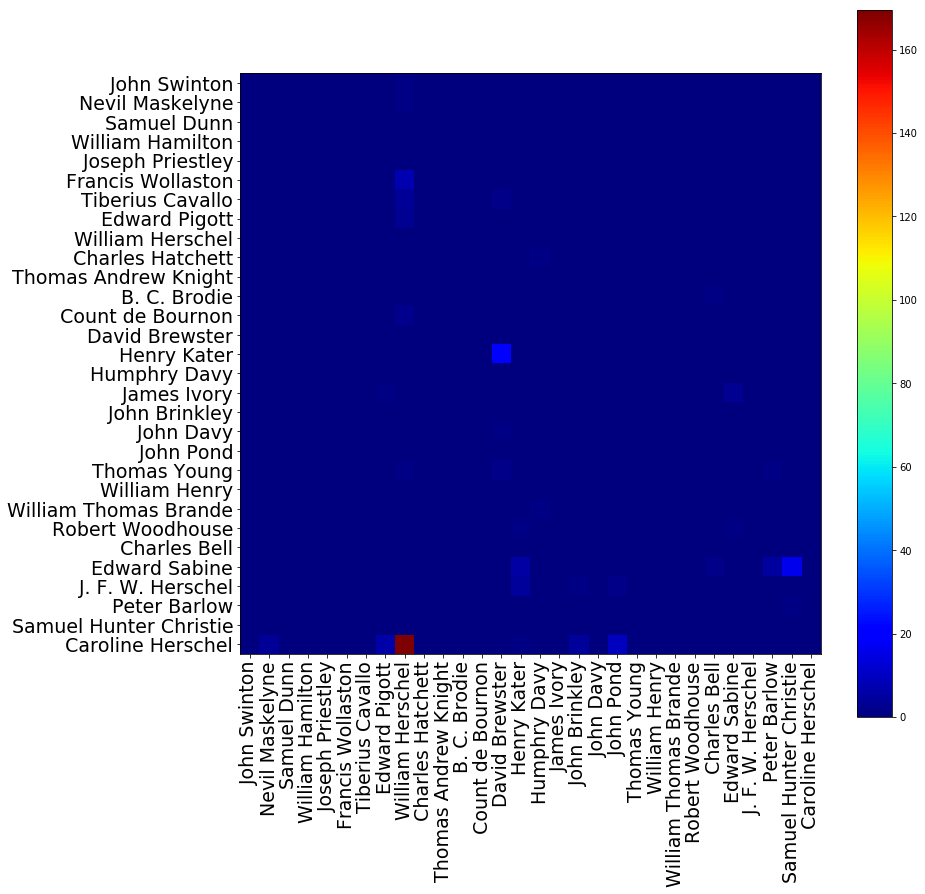

CPU times: user 2.2 s, sys: 311 ms, total: 2.51 s
Wall time: 1.1 s


In [1603]:
%%time

#speakers.reverse()

style='jet'

plt.figure(figsize = (13,13))
plt.imshow(neW, cmap=style)
plt.yticks(np.arange(len(new_speakers)),new_speakers, fontsize=19);
plt.xticks(np.arange(len(new_speakers)),new_speakers,rotation=90, fontsize=19)
plt.colorbar()


#plt.savefig("Astronomy_AllWords_29Authors_and_Caroline_bigger_jet.png", bbox_inches="tight")
plt.show()

In [1476]:
len(neW[0])

33

In [1586]:
# 
#stats = open('Chemistry_Oxygen_25Authors_stats.txt').read()
stats = open('Astronomy_AllSelectedWords_40Authors_and_Caroline_stats.txt').read()
sections = stats.split('\n\n')
largest = sections[1].split('\n')[1:]
largest

["(21, 'Daines Barrington')",
 "(19, 'Charles Blagden')",
 "(19, 'Caroline Herschel')",
 "(17, 'Samuel Dunn')",
 "(17, 'Henry Cavendish')",
 "(16, 'George Pearson')",
 "(15, 'John Hunter')",
 "(14, 'Robert Woodhouse')",
 "(13, 'Anthony Carlisle')",
 "(12, 'John Swinton')",
 "(12, 'Count de Bournon')",
 "(11, 'Thomas Young')",
 "(11, 'James Ivory')",
 "(11, 'Edward Sabine')",
 "(11, 'Charles Hatchett')",
 "(10, 'John Davy')",
 "(9, 'William Thomas Brande')",
 "(9, 'J. Brinkley')",
 "(9, 'Edward Pigott')",
 "(9, 'Charles Bell')",
 "(8, 'Tiberius Cavallo')",
 "(8, 'David Brewster')",
 "(7, 'William Hamilton')",
 "(7, 'Peter Barlow')",
 "(7, 'John Ellis')",
 "(7, 'J. F. W. Herschel')",
 "(7, 'B. C. Brodie')",
 "(6, 'Nevil Maskelyne')",
 "(5, 'William Henry')",
 "(5, 'Samuel Hunter Christie')",
 "(5, 'John Pond')",
 "(5, 'Henry Kater')",
 "(5, 'H. Davy')",
 "(4, 'William Hyde Wollaston')",
 "(4, 'Thomas Andrew Knight')",
 "(4, 'John Brinkley')",
 "(3, 'Joseph Priestley')",
 "(3, 'Francis Wo

In [1589]:
# 2latex
n=12
iv = [round(float(l.split(',')[0][1:]),4) for l in largest[:n]]
ii = [l.split(',')[1][2:-2] for l in largest[:n]]
print(ii, iv)

title = 'N. of Influenced Authors'

cats = {title: iv,
        'Authors': ii
        }

df = pd.DataFrame(cats, columns = [title, 'Authors'])

print(df.to_latex(index=False))

['Daines Barrington', 'Charles Blagden', 'Caroline Herschel', 'Samuel Dunn', 'Henry Cavendish', 'George Pearson', 'John Hunter', 'Robert Woodhouse', 'Anthony Carlisle', 'John Swinton', 'Count de Bournon', 'Thomas Young'] [21.0, 19.0, 19.0, 17.0, 17.0, 16.0, 15.0, 14.0, 13.0, 12.0, 12.0, 11.0]
\begin{tabular}{rl}
\toprule
 N. of Influenced Authors &            Authors \\
\midrule
                     21.0 &  Daines Barrington \\
                     19.0 &    Charles Blagden \\
                     19.0 &  Caroline Herschel \\
                     17.0 &        Samuel Dunn \\
                     17.0 &    Henry Cavendish \\
                     16.0 &     George Pearson \\
                     15.0 &        John Hunter \\
                     14.0 &   Robert Woodhouse \\
                     13.0 &   Anthony Carlisle \\
                     12.0 &       John Swinton \\
                     12.0 &   Count de Bournon \\
                     11.0 &       Thomas Young \\
\bottomrule
\end{t